<a href="https://colab.research.google.com/github/Omayer-Ahmed/C_Programming_Project/blob/main/Time_series_cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install pandas

In [ ]:
#!pip install prophet

In [ ]:
from google.colab import files
files.upload()

Saving airline-passengers.csv to airline-passengers.csv


{'airline-passengers.csv': b'"Month","Passengers"\r\n"1949-01",112\r\n"1949-02",118\r\n"1949-03",132\r\n"1949-04",129\r\n"1949-05",121\r\n"1949-06",135\r\n"1949-07",148\r\n"1949-08",148\r\n"1949-09",136\r\n"1949-10",119\r\n"1949-11",104\r\n"1949-12",118\r\n"1950-01",115\r\n"1950-02",126\r\n"1950-03",141\r\n"1950-04",135\r\n"1950-05",125\r\n"1950-06",149\r\n"1950-07",170\r\n"1950-08",170\r\n"1950-09",158\r\n"1950-10",133\r\n"1950-11",114\r\n"1950-12",140\r\n"1951-01",145\r\n"1951-02",150\r\n"1951-03",178\r\n"1951-04",163\r\n"1951-05",172\r\n"1951-06",178\r\n"1951-07",199\r\n"1951-08",199\r\n"1951-09",184\r\n"1951-10",162\r\n"1951-11",146\r\n"1951-12",166\r\n"1952-01",171\r\n"1952-02",180\r\n"1952-03",193\r\n"1952-04",181\r\n"1952-05",183\r\n"1952-06",218\r\n"1952-07",230\r\n"1952-08",242\r\n"1952-09",209\r\n"1952-10",191\r\n"1952-11",172\r\n"1952-12",194\r\n"1953-01",196\r\n"1953-02",196\r\n"1953-03",236\r\n"1953-04",235\r\n"1953-05",229\r\n"1953-06",243\r\n"1953-07",264\r\n"1953-08",27

In [ ]:
import pandas as pd
from prophet import Prophet

In [ ]:
df_csv=pd.read_csv("airline-passengers.csv")

In [ ]:
df_csv.tail()

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [ ]:
df_csv.isnull().sum()

Month         0
Passengers    0
dtype: int64

<Axes: >

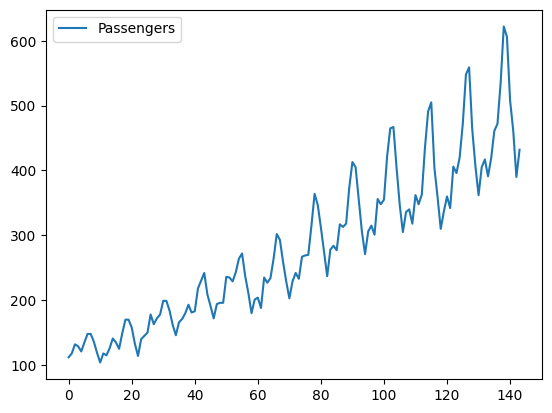

In [ ]:
df_csv.plot()

In [ ]:
#rename the columns
df_csv.columns=['ds','y']
df_csv.head()

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
#initialize the model
model=Prophet()

In [ ]:
df_csv.columns

Index(['ds', 'y'], dtype='object')

In [ ]:
#model.component_modes

In [ ]:
#fit the model
model.fit(df_csv)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphg6m4rhr/vqesxpkz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphg6m4rhr/sd__to6z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69005', 'data', 'file=/tmp/tmphg6m4rhr/vqesxpkz.json', 'init=/tmp/tmphg6m4rhr/sd__to6z.json', 'output', 'file=/tmp/tmphg6m4rhr/prophet_model1ze4u210/prophet_model-20240317050814.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:08:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:08:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
df_csv.tail()

,ds,y
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [ ]:
#create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [ ]:
future_dates.tail()

,ds
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30
508,1961-12-01




    Trend: It represents the underlying trend in the data. The trend captures the long-term direction or pattern in the time series.

    yhat_lower and yhat_upper: These are the lower and upper bounds of the predicted values (yhat). The model generates a range of possible values within which the actual values are expected to fall.

    Trend_lower and trend_upper: These are the lower and upper bounds of the trend component. They define the possible range of values for the trend. The trend is expected to stay within these bounds.

    Additive_terms: These terms represent additional components in the model beyond the trend. They can include seasonality, holidays, or any other patterns that are not captured by the trend alone.

    Additive_terms_lower and additive_terms_upper: These are the lower and upper bounds of the additive terms. They define the range of possible values for the additional components.

    Yearly: It specifically refers to the yearly component of the additive terms. It captures any yearly seasonality or patterns that repeat on an annual basis.

    Yearly_lower and yearly_upper: These are the lower and upper bounds of the yearly component. They define the range of possible values for the yearly seasonality.

    Multiplicative_terms: These terms represent multiplicative components in the model. They indicate any factors that affect the trend multiplicatively rather than additively.

    Multiplicative_terms_lower and multiplicative_terms_upper: These are the lower and upper bounds of the multiplicative terms. They define the range of possible values for the multiplicative components.

    yhat: It represents the predicted values generated by the model, which include the trend, additive terms, and multiplicative terms.


In [ ]:
prediction= model.predict(future_dates)
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,107.406338,55.504220,116.599771,107.406338,107.406338,-21.387455,-21.387455,-21.387455,-21.387455,-21.387455,-21.387455,0.0,0.0,0.0,86.018883
1,1949-02-01,109.550561,50.489290,107.062359,109.550561,109.550561,-30.055335,-30.055335,-30.055335,-30.055335,-30.055335,-30.055335,0.0,0.0,0.0,79.495226
2,1949-03-01,111.487279,79.529147,139.982515,111.487279,111.487279,-0.461698,-0.461698,-0.461698,-0.461698,-0.461698,-0.461698,0.0,0.0,0.0,111.025581
3,1949-04-01,113.631502,82.772700,139.305128,113.631502,113.631502,-4.912485,-4.912485,-4.912485,-4.912485,-4.912485,-4.912485,0.0,0.0,0.0,108.719017
4,1949-05-01,115.706556,82.728680,139.011210,115.706556,115.706556,-3.611275,-3.611275,-3.611275,-3.611275,-3.611275,-3.611275,0.0,0.0,0.0,112.095281


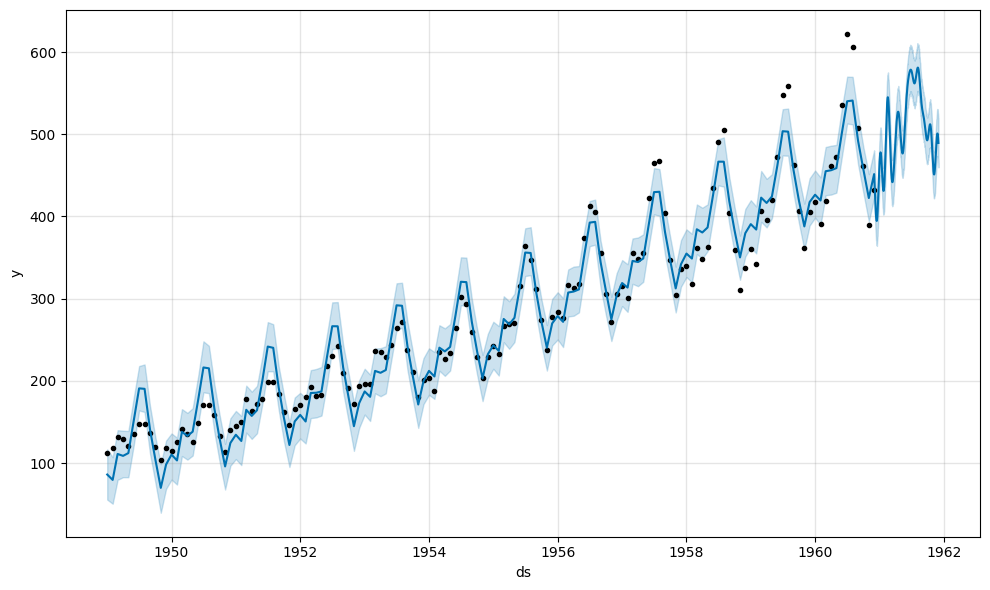

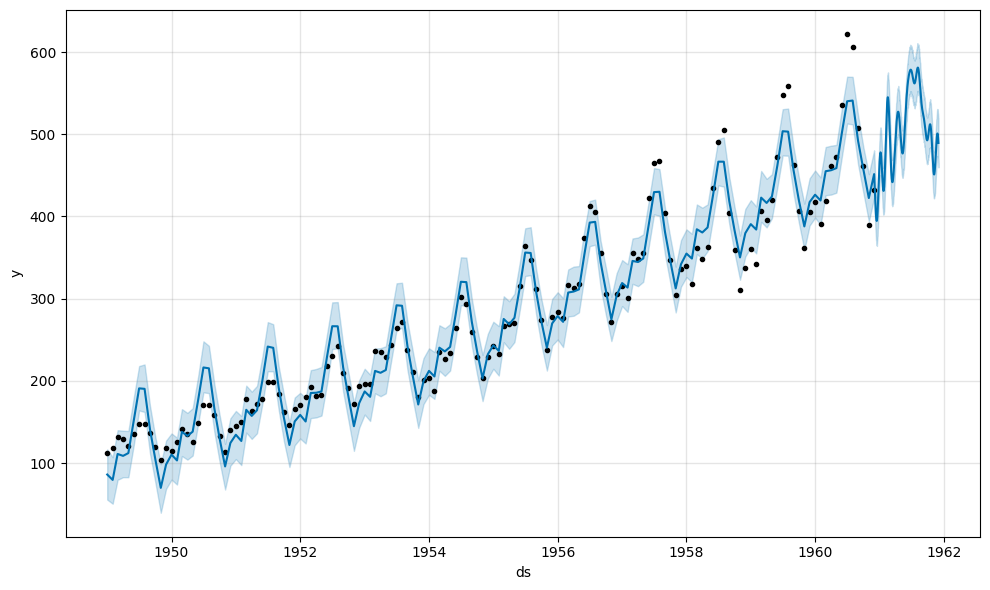

In [ ]:
model.plot(prediction)

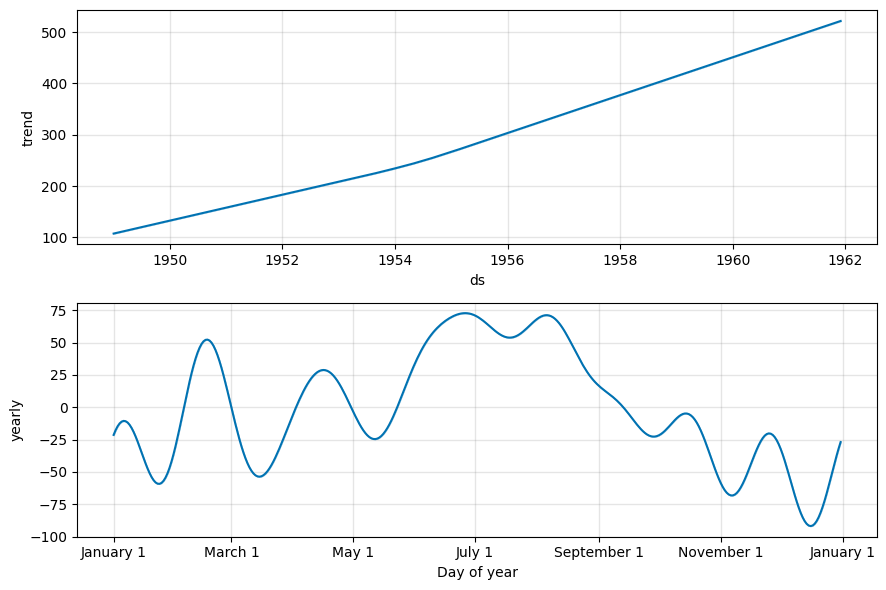

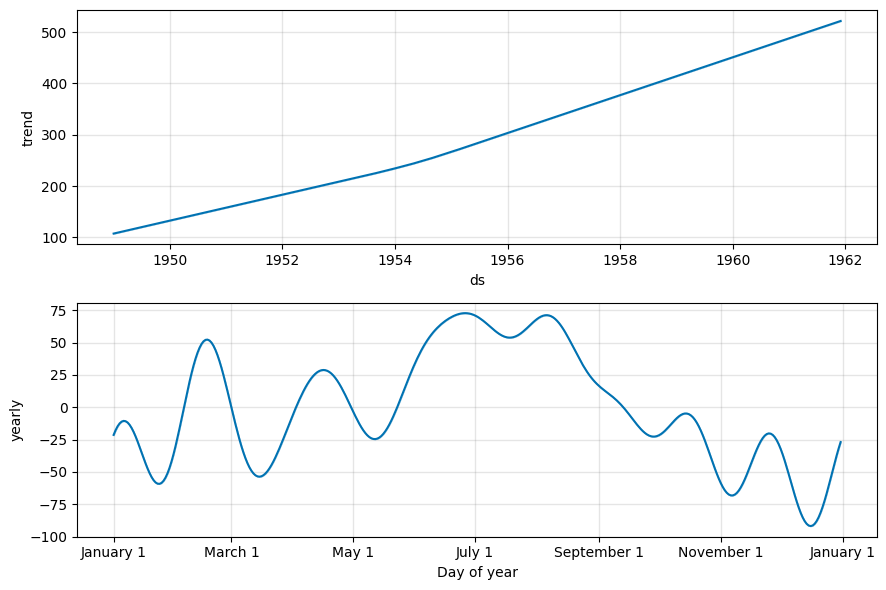

In [ ]:
model.plot_components(prediction)